# FIFA Keşifsel Veri Analizi (EDA)
Bu not defteri, FIFA oyuncu verilerinin keşifsel veri analizini (EDA) içermektedir.
Oyuncu istatistikleri ve veri setindeki önemli desenler incelenecektir.

In [1]:
!pip install pandas 

## Veri Yükleme ve Ön İşleme
FIFA oyuncu verileri yükleniyor ve ön işleme adımları gerçekleştiriliyor.

In [2]:
import pandas as pd
import os

# Boş bir liste oluşturuyoruz
dfs = []

# FIFA 15'ten FIFA 22'ye kadar olan dosyaları okuyoruz
for year in range(15, 23):
    file_name = f'players_{year}.csv'  # Dosya adını oluşturuyoruz (örneğin, players_15.csv)
    if os.path.exists(file_name):  # Dosya var mı kontrol ediyoruz
        # CSV dosyasını okuyoruz ve karışık veri türleri için low_memory=False kullanıyoruz
        df = pd.read_csv(file_name, low_memory=False)
        df['Year'] = 2000 + year  # Yıl bilgisini ekliyoruz (örneğin, FIFA 15 için 2015)
        dfs.append(df)  # DataFrame'i listeye ekliyoruz

# Tüm veri setlerini birleştirme
combined_df = pd.concat(dfs, ignore_index=True)  # Tüm DataFrame'leri birleştiriyoruz
print("Birleştirilmiş Veri Seti Boyutu:", combined_df.shape)
print(combined_df.head())

Birleştirilmiş Veri Seti Boyutu: (142079, 111)
   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini               CF   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           LW, LM   
2          A. Robben                         Arjen Robben       RM, LM, RW   
3     Z. Ibrahimović                   Zlatan Ibrahimović               ST   
4           M. Neuer                   Manuel Peter Neuer               GK   

   overall  potential    value_eur  wage_eur  age  ...    cb   rcb    rb  \
0    

In [6]:
!pip install numpy matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklerin daha net görünmesi için ayarlar
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [4]:
# CSV dosyalarını yükleme
df = combined_df.copy()  # Veriyi bozmamak için kopyasını alalım

# İlk 5 satıra göz atalım
print(df.head())

# Veri setinin genel bilgileri
print(df.info())

# Eksik değerleri kontrol edelim
print(df.isnull().sum().sort_values(ascending=False))


   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini               CF   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           LW, LM   
2          A. Robben                         Arjen Robben       RM, LM, RW   
3     Z. Ibrahimović                   Zlatan Ibrahimović               ST   
4           M. Neuer                   Manuel Peter Neuer               GK   

   overall  potential    value_eur  wage_eur  age  ...    cb   rcb    rb  \
0       93         95  100500000.0  550000.0   27  .

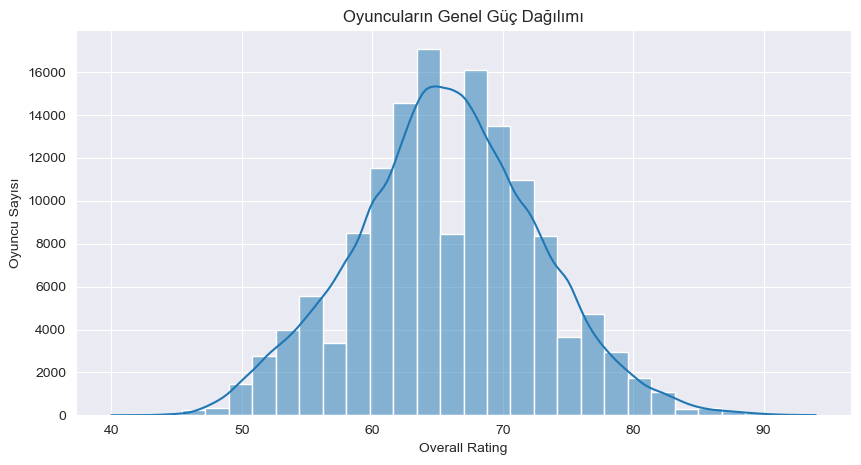

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df["overall"], bins=30, kde=True)
plt.title("Oyuncuların Genel Güç Dağılımı")
plt.xlabel("Overall Rating")
plt.ylabel("Oyuncu Sayısı")
plt.show()


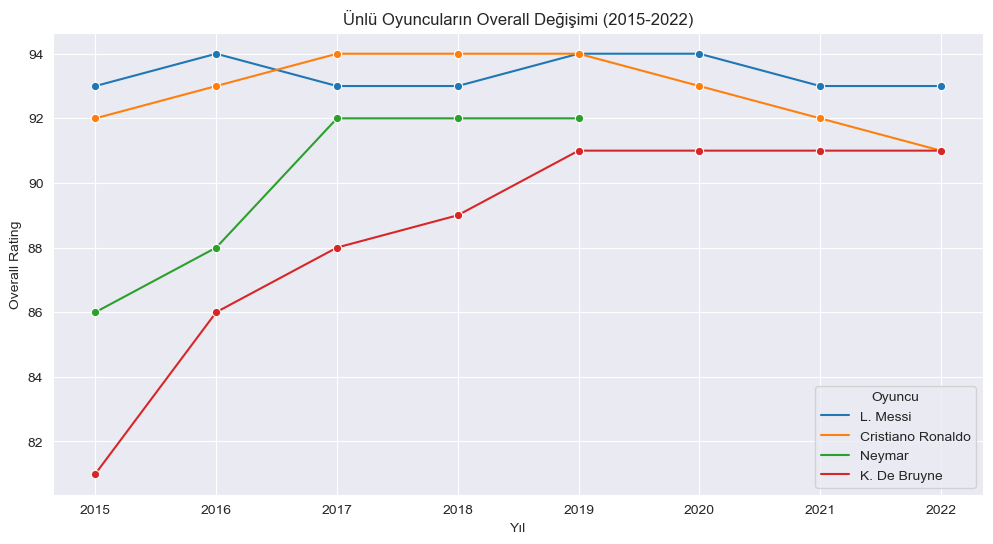

In [6]:
top_players = df[df["short_name"].isin(["L. Messi", "Cristiano Ronaldo", "Neymar", "K. De Bruyne"])]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_players, x="Year", y="overall", hue="short_name", marker="o")
plt.title("Ünlü Oyuncuların Overall Değişimi (2015-2022)")
plt.xlabel("Yıl")
plt.ylabel("Overall Rating")
plt.legend(title="Oyuncu")
plt.show()


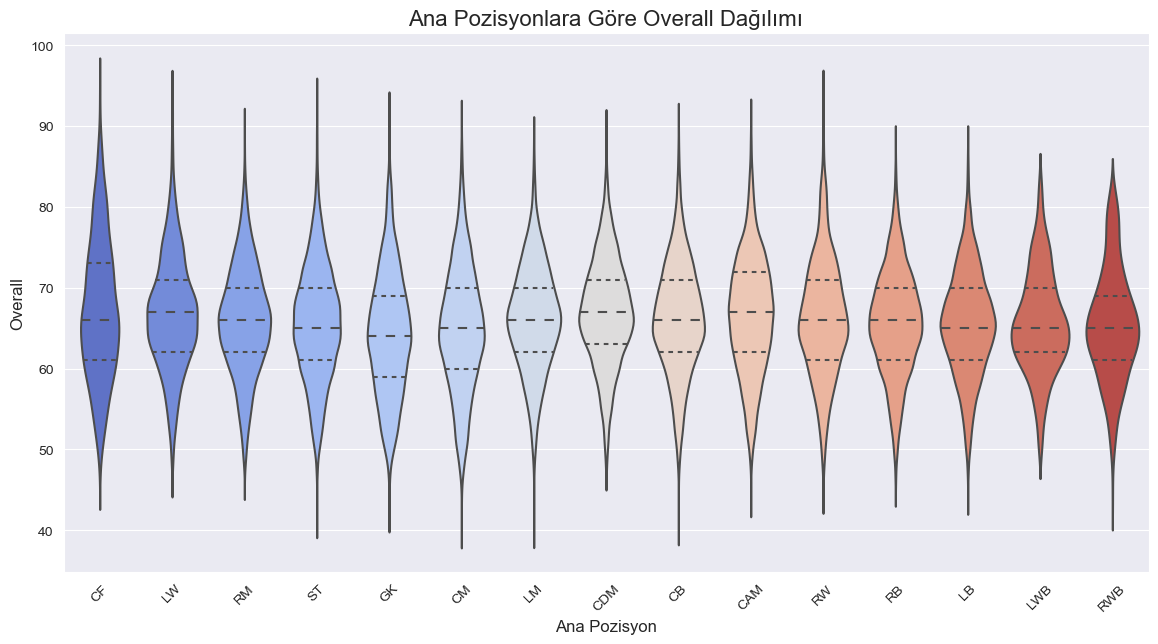

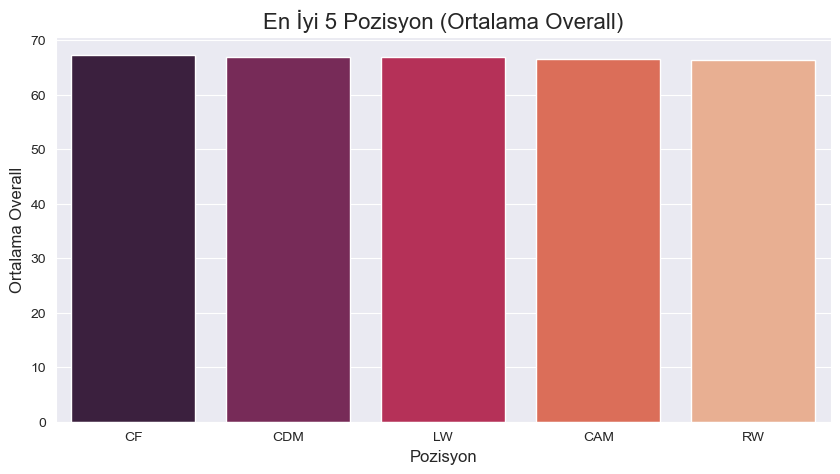

In [7]:
# Ana pozisyonlara göre gruplandırma
df["main_position"] = df["player_positions"].str.split(",").str[0]

# Eksik değerleri temizle
df.dropna(subset=["main_position", "overall"], inplace=True)

# Violin plot ile pozisyonlara göre overall dağılımı
plt.figure(figsize=(14, 7))
sns.violinplot(data=df, x="main_position", y="overall", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45, fontsize=10)
plt.title("Ana Pozisyonlara Göre Overall Dağılımı", fontsize=16)
plt.xlabel("Ana Pozisyon", fontsize=12)
plt.ylabel("Overall", fontsize=12)
plt.show()

# En iyi 5 pozisyonun ortalama overall değerleri
top_positions = df.groupby("main_position")["overall"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_positions.index, y=top_positions.values, palette="rocket")
plt.title("En İyi 5 Pozisyon (Ortalama Overall)", fontsize=16)
plt.xlabel("Pozisyon", fontsize=12)
plt.ylabel("Ortalama Overall", fontsize=12)
plt.show()

In [9]:
print(df.describe())

           sofifa_id        overall      potential     value_eur  \
count  142079.000000  142079.000000  142079.000000  1.401820e+05   
mean   211625.235095      65.706121      70.726335  2.268820e+06   
std     34846.473490       7.064665       6.271695  5.779823e+06   
min         2.000000      40.000000      40.000000  1.000000e+03   
25%    196142.000000      61.000000      66.000000  3.000000e+05   
50%    216393.000000      66.000000      70.000000  7.000000e+05   
75%    234430.000000      70.000000      75.000000  1.800000e+06   
max    264640.000000      94.000000      95.000000  1.940000e+08   

            wage_eur            age      height_cm      weight_kg  \
count  140457.000000  142079.000000  142079.000000  142079.000000   
mean    11113.728045      25.117125     181.206470      75.247911   
std     22251.563020       4.659230       6.734544       6.997585   
min       500.000000      16.000000     154.000000      49.000000   
25%      2000.000000      21.000000     17

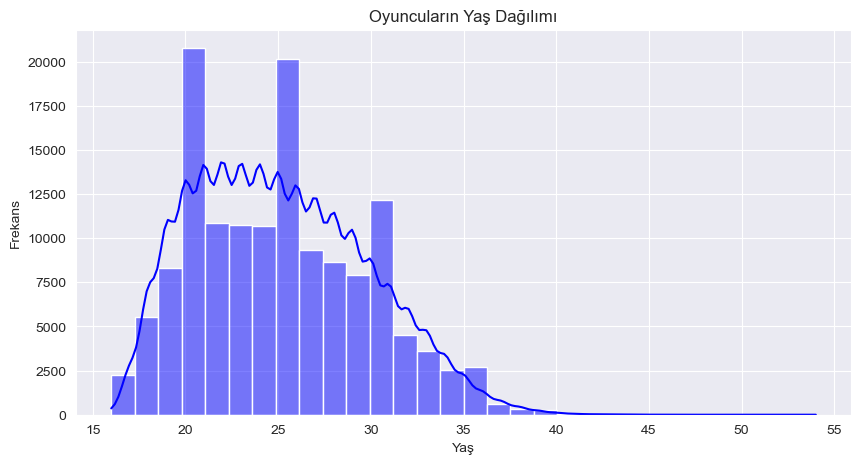

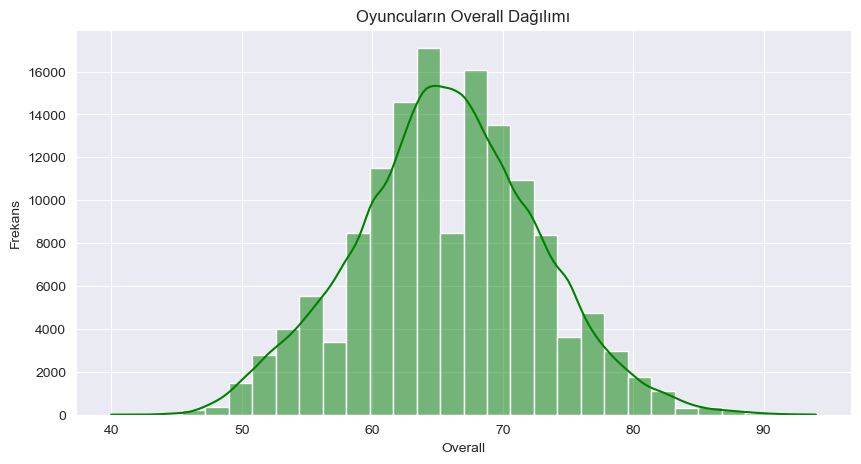

In [9]:
# Yaş dağılımı
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=30, kde=True, color="blue")
plt.title("Oyuncuların Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

# Overall dağılımı
plt.figure(figsize=(10, 5))
sns.histplot(df["overall"], bins=30, kde=True, color="green")
plt.title("Oyuncuların Overall Dağılımı")
plt.xlabel("Overall")
plt.ylabel("Frekans")
plt.show()

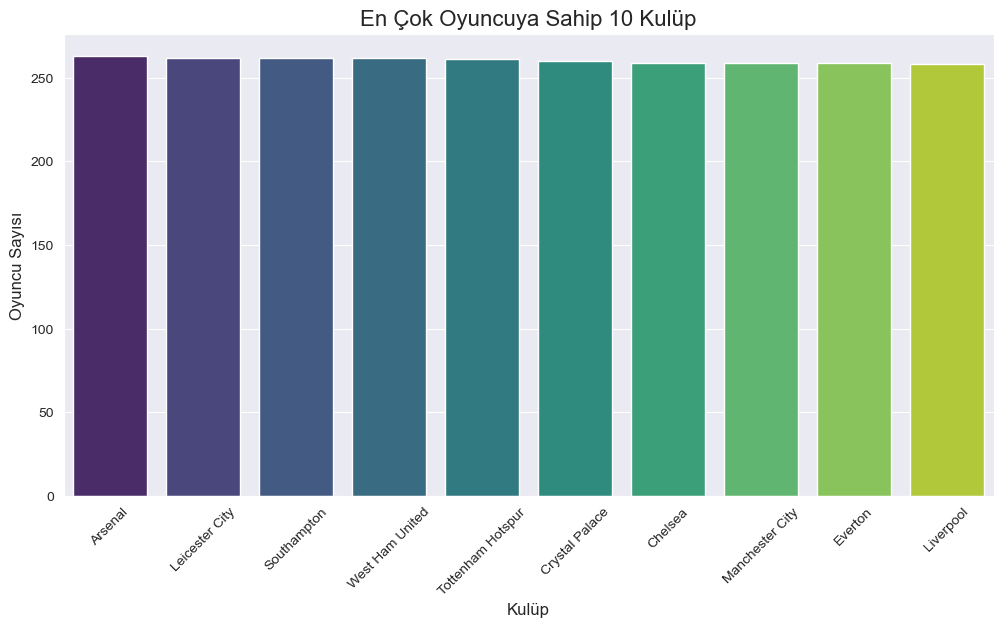

In [10]:
# En çok oyuncuya sahip 10 kulüp
top_clubs = df["club_name"].value_counts().head(10)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_clubs.index, y=top_clubs.values, palette="viridis")
plt.title("En Çok Oyuncuya Sahip 10 Kulüp", fontsize=16)
plt.xlabel("Kulüp", fontsize=12)
plt.ylabel("Oyuncu Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.show()

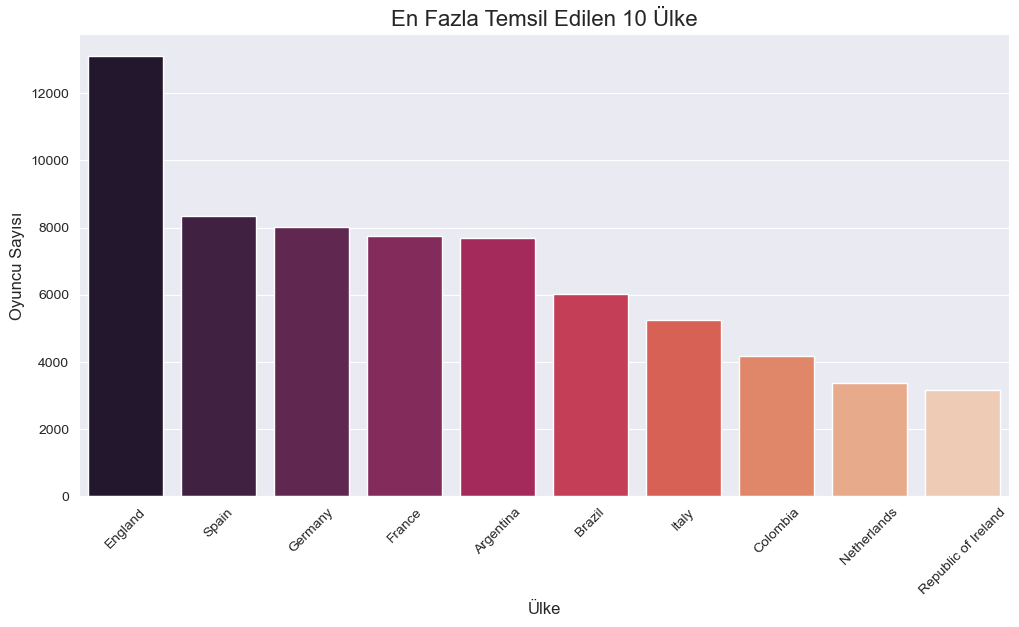

In [11]:
# En fazla oyuncuya sahip 10 ülke
top_countries = df["nationality_name"].value_counts().head(10)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="rocket")
plt.title("En Fazla Temsil Edilen 10 Ülke", fontsize=16)
plt.xlabel("Ülke", fontsize=12)
plt.ylabel("Oyuncu Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.show()

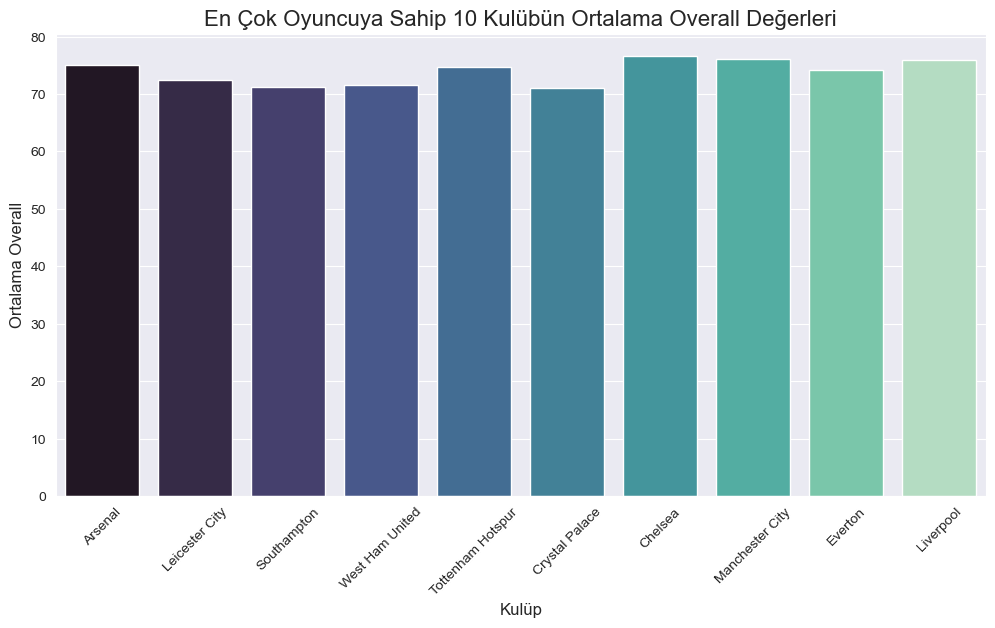

In [13]:
# En çok oyuncuya sahip 10 kulübün ortalama overall değerleri
top_clubs_overall = df.groupby("club_name")["overall"].mean().loc[top_clubs.index]

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_clubs_overall.index, y=top_clubs_overall.values, palette="mako")
plt.title("En Çok Oyuncuya Sahip 10 Kulübün Ortalama Overall Değerleri", fontsize=16)
plt.xlabel("Kulüp", fontsize=12)
plt.ylabel("Ortalama Overall", fontsize=12)
plt.xticks(rotation=45)
plt.show()

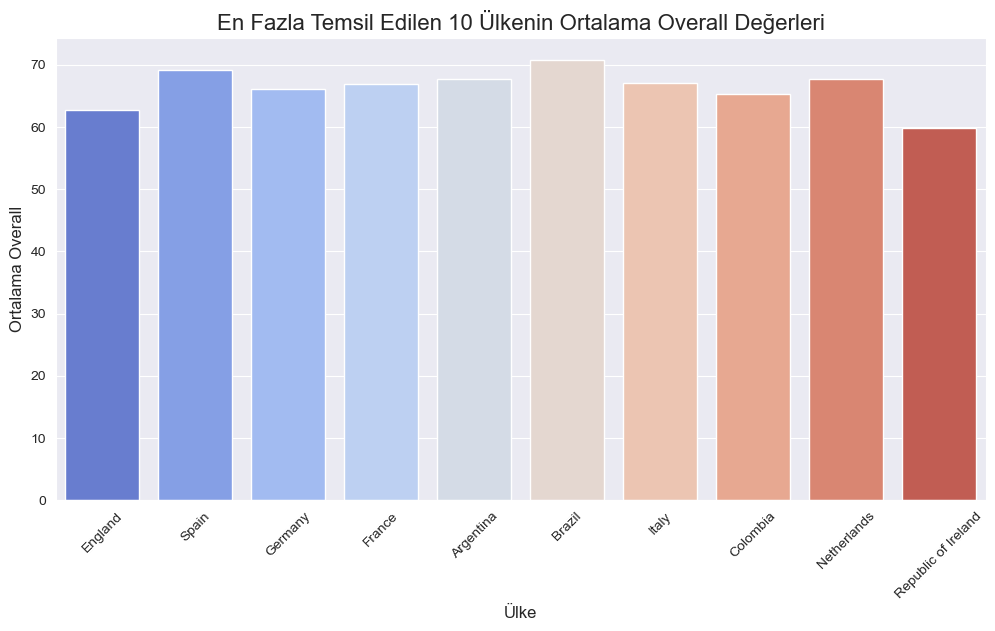

In [21]:
# En fazla oyuncuya sahip 10 ülkenin ortalama overall değerleri
top_countries_overall = df.groupby("nationality_name")["overall"].mean().loc[top_countries.index]

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_overall.index, y=top_countries_overall.values, palette="coolwarm")
plt.title("En Fazla Temsil Edilen 10 Ülkenin Ortalama Overall Değerleri", fontsize=16)
plt.xlabel("Ülke", fontsize=12)
plt.ylabel("Ortalama Overall", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Görselleştirme ve Sonuçlar
Oyuncuların yaş, yetenek ve piyasa değeri gibi değişkenleri analiz edilecektir.
Grafikler ve istatistiksel özetler ile bulgular açıklanacaktır.

## Veri Dağılımı Analizi
Aşağıda oyuncuların ve piyasa değeri gibi değişkenleri için dağılım grafikleri bulunmaktadır.

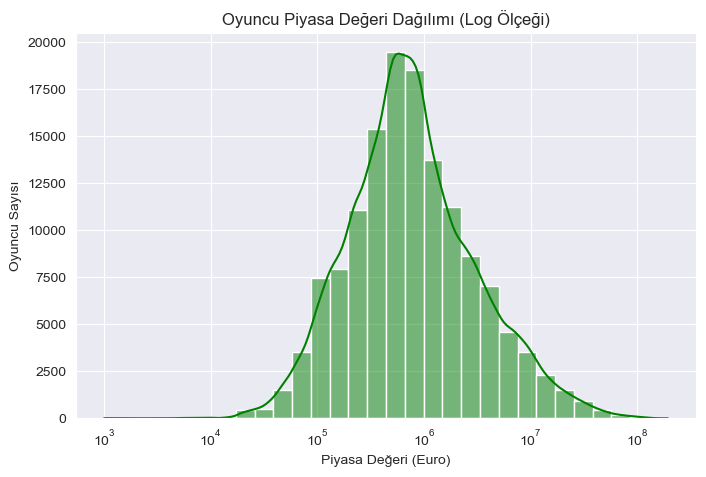

In [15]:

# Piyasa Değeri Dağılımı (Log ölçeğinde)
plt.figure(figsize=(8, 5))
sns.histplot(combined_df['value_eur'].dropna(), bins=30, kde=True, color='green', log_scale=True)
plt.title('Oyuncu Piyasa Değeri Dağılımı (Log Ölçeği)')
plt.xlabel('Piyasa Değeri (Euro)')
plt.ylabel('Oyuncu Sayısı')
plt.show()
    

## Korelasyon Analizi
Aşağıdaki heatmap, oyuncu özellikleri arasındaki ilişkileri göstermektedir.

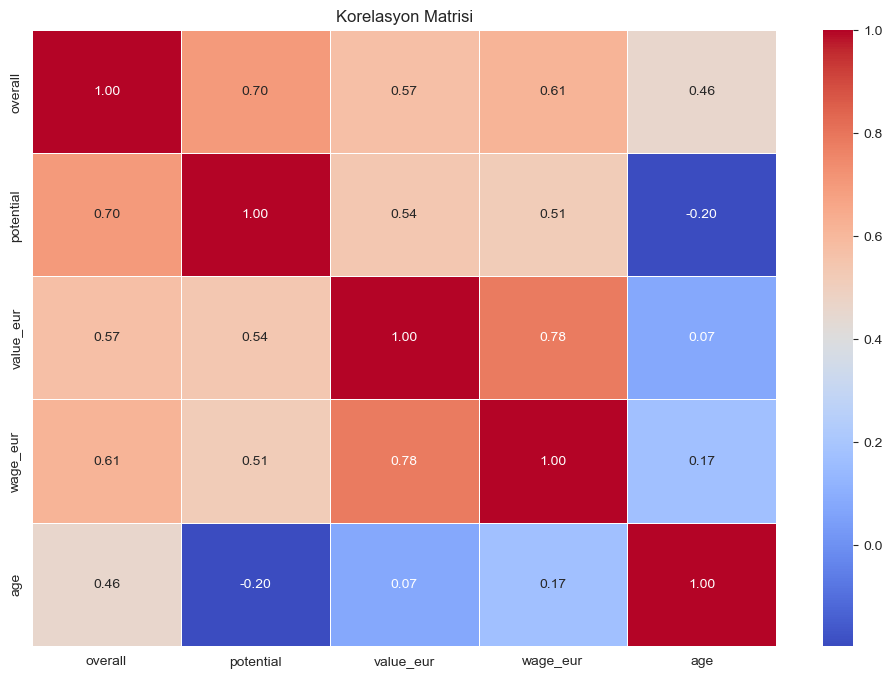

In [16]:

# Korelasyon matrisi
plt.figure(figsize=(12, 8))
corr = combined_df[['overall', 'potential', 'value_eur', 'wage_eur', 'age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()
    

## Trend Analizi
Yıllara göre oyuncuların ortalama genel reytingi aşağıda gösterilmiştir.

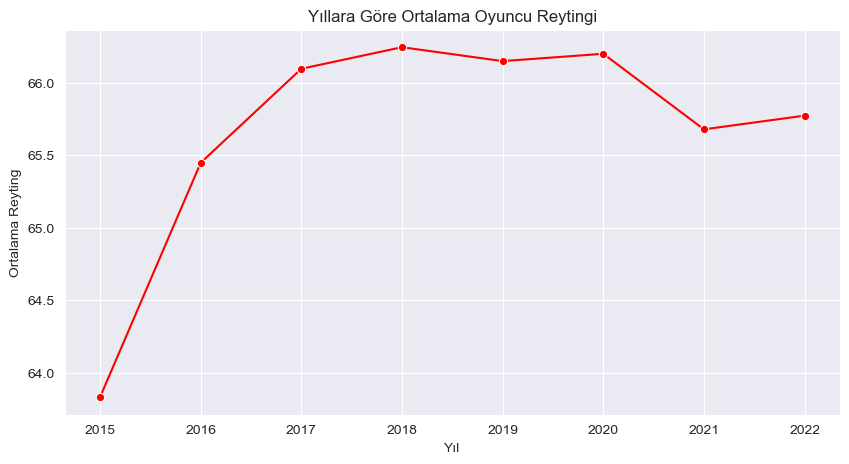

In [18]:

# Yıllara göre ortalama oyuncu reytingi
plt.figure(figsize=(10, 5))
sns.lineplot(data=combined_df.groupby('Year')['overall'].mean(), marker='o', color='red')
plt.title('Yıllara Göre Ortalama Oyuncu Reytingi')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Reyting')
plt.grid(True)
plt.show()
    